<a href="https://colab.research.google.com/github/sinyoung0110/DeepLearning/blob/main/cat%26dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2024-05-17 05:28:58--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.101.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   231MB/s    in 0.3s    

2024-05-17 05:28:58 (231 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [24]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Instructions for updating:
non-resource variables are not supported in the long term


In [25]:
rootPath = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(rootPath, 'train')
validation_dir = os.path.join(rootPath, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [26]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.127.jpg', 'cat.759.jpg', 'cat.112.jpg', 'cat.973.jpg', 'cat.937.jpg', 'cat.481.jpg', 'cat.339.jpg', 'cat.756.jpg', 'cat.98.jpg', 'cat.179.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [27]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [22]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rootPath = '/tmp/cats_and_dogs_filtered'

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(64, 64),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'validation'),
    target_size=(64, 64),
    subset='validation'
)


Found 1800 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.InputLayer(input_shape=(64, 64, 3)))
model.add(layers.Conv2D(16, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)       

In [29]:
trainGen.samples

1800

In [30]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc'],
)


In [53]:
epochs = 200
history = model.fit_generator(
    trainGen,
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs,
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)


Epoch 1/200
1/9 [==>...........................] - ETA: 1s - batch: 0.0000e+00 - size: 32.0000 - loss: 0.4946 - acc: 0.6875

<ipython-input-53-e9addfefbba6>:2: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


9/9 [==============================] - 2s 256ms/step - batch: 4.0000 - size: 32.0000 - loss: 0.4807 - acc: 0.7656 - val_loss: 0.4659 - val_acc: 0.7004
Epoch 2/200
9/9 [==============================] - 1s 173ms/step - batch: 4.0000 - size: 32.0000 - loss: 0.4693 - acc: 0.7552 - val_loss: 0.5265 - val_acc: 0.7004
Epoch 3/200
9/9 [==============================] - 1s 161ms/step - batch: 4.0000 - size: 32.0000 - loss: 0.5021 - acc: 0.7674 - val_loss: 0.4555 - val_acc: 0.7457
Epoch 4/200
9/9 [==============================] - 1s 162ms/step - batch: 4.0000 - size: 32.0000 - loss: 0.4360 - acc: 0.7865 - val_loss: 0.5579 - val_acc: 0.7047
Epoch 5/200
9/9 [==============================] - 1s 176ms/step - batch: 4.0000 - size: 32.0000 - loss: 0.5059 - acc: 0.7413 - val_loss: 0.4924 - val_acc: 0.7414
Epoch 6/200
9/9 [==============================] - 1s 123ms/step - batch: 4.0000 - size: 29.3333 - loss: 0.5057 - acc: 0.7500 - val_loss: 0.4380 - val_acc: 0.7651
Epoch 7/200
9/9 [=================

In [54]:
print("-- Evaluate --")
scores = model.evaluate_generator(validationGen, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


-- Evaluate --


<ipython-input-54-2568f98f15cf>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(validationGen, steps=5)


acc: 75.00%


In [56]:
model.evaluate_generator(validationGen)


<ipython-input-56-8ef3a80f4427>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validationGen)


[0.5129327848553658, 0.74]

In [34]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(16, 1))

    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
    plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
    plt.legend(bbox_to_anchor=(1, 0))

    plt.show()


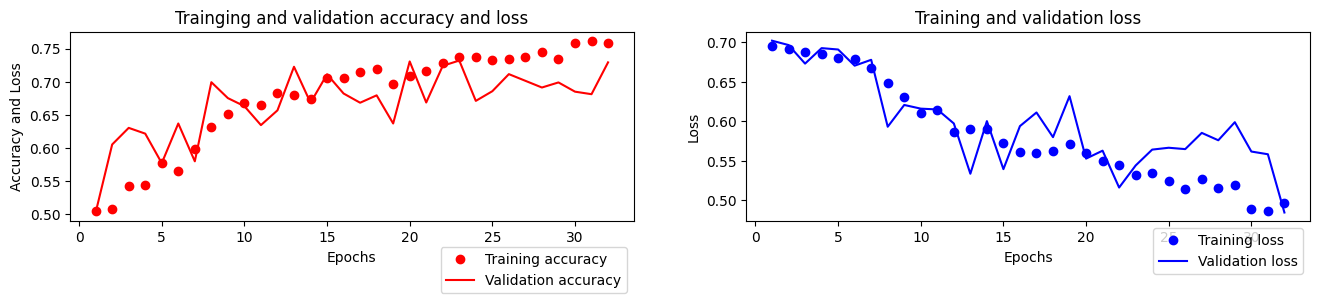

In [35]:
show_graph(history.history)

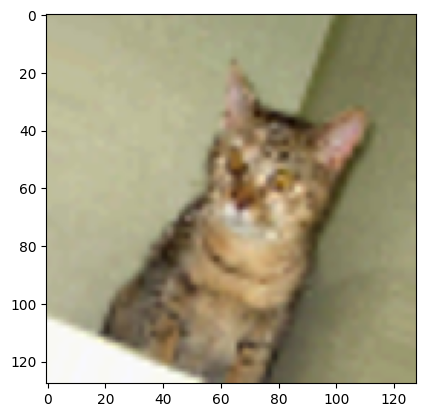

예측: 개
정답: 고양이


In [52]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np
import matplotlib.pyplot as plt  # Matplotlib를 사용하여 이미지를 시각화

cls_index = ['고양이', '개']

imgs = validationGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
plt.show()

# 모델 예측 수행
result = model.predict(arr.reshape(1, 64, 64, 3))

# 예측 클래스 인덱스 계산
predicted_class_index = np.argmax(result, axis=1)[0]

print('예측: {}'.format(cls_index[predicted_class_index]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))


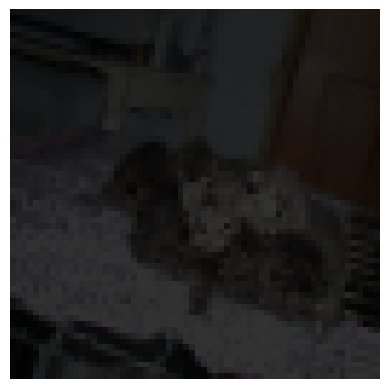

ValueError: cannot reshape array of size 12288 into shape (1,128,128,3)

In [43]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

imgs = validationGen.next()
arr = imgs[0][0]

# 이미지를 그대로 시각화
plt.imshow(arr)
plt.axis('off')  # 축 제거
plt.show()

# 모델 예측 수행
result = model.predict(arr.reshape(1, 128, 128, 3))  # target_size에 맞추어 변경
predicted_class_index = np.argmax(result, axis=1)[0]

print('예측: {}'.format(cls_index[predicted_class_index]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))
